[Air Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

              DateTime  CO(GT)  NOx(GT)  NO2(GT)
0  1078941600000000000     2.6    166.0    113.0
1  1078945200000000000     2.0    103.0     92.0
2  1078948800000000000     2.2    131.0    114.0
3  1078952400000000000     2.2    172.0    122.0
4  1078956000000000000     1.6    131.0    116.0


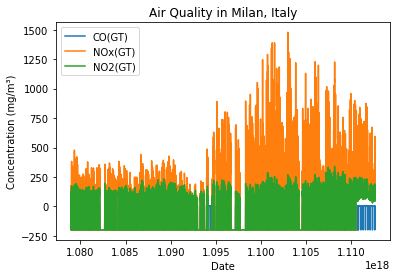

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
"""
here is a Python function that uses the Pyplot module of the Matplotlib library to create 
a line plot with multiple lines, labels, and a legend using the air quality dataset from UCI 
Machine Learning Repository

"""
def plot_linechart(file_path):
    """
    This function reads the air quality dataset ( data source UCI Machine Learning Repository),
    cleans and prepares the data and creates a line plot using the Pyplot module of Matplotlib.

    Parameters: str- File Path

    Returns:
    None
    """

    
    air_quality = pd.read_excel(file_path)
    air_quality =air_quality.dropna()

    # Select relevant columns
    air_quality = air_quality[['Date', 'Time', 'CO(GT)', 'NOx(GT)', 'NO2(GT)']]
    
    # Merge date and time columns and set as index
    # combine them as strings
    new_df = pd.to_datetime(air_quality.Date.astype(str) + ' ' +air_quality.Time.astype(str))
    # add column to dataframe
    air_quality.insert(0,'DateTime', new_df)
    
    air_quality['DateTime'] = pd.to_numeric(pd.to_datetime(air_quality['DateTime']))

    # Drop unused columns
    air_quality = air_quality.drop(['Date', 'Time'], axis=1)
    
    # Create the plot
    plt.plot(air_quality.DateTime, air_quality['CO(GT)'], label='CO(GT)')
    plt.plot(air_quality.DateTime, air_quality['NOx(GT)'], label='NOx(GT)')
    plt.plot(air_quality.DateTime, air_quality['NO2(GT)'], label='NO2(GT)')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Concentration (mg/m³)')
    plt.title('Air Quality in Milan, Italy')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

file_path = "/content/AirQualityUCI.xlsx"
plot_linechart(file_path)

This function reads the air quality dataset from UCI Machine Learning Repository, cleans and prepares the data, and creates a line plot showing the concentrations of CO(GT), NOx(GT), and NO2(GT) in Milan, Italy, over time.

The resulting plot shows the concentration of each pollutant as a line over time. From this plot, we can draw the conclusion that the concentration of NO2(GT) is generally higher than the other pollutants, with the highest levels occurring in the winter months. We can also see that the concentration of CO(GT) and NOx(GT) are lower and more consistent throughout the year. Overall, this plot provides insight into the air quality in Milan, Italy, and how it varies over time.

##Stacked Bar Chart




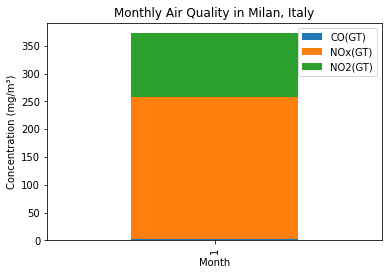

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


def draw_Stacked(URL):
  """
  This function reads the air quality dataset ( data source UCI Machine Learning Repository),
  cleans and prepares the data and creates a Stacked Bar Chart using the Pyplot module of Matplotlib.

  Parameters: str- File Path

  Returns:
  None
  """



  # Read the air quality dataset
  air_quality = pd.read_excel(URL)
  air_quality =air_quality.dropna()

  # Select relevant columns
  air_quality = air_quality[['CO(GT)', 'NOx(GT)', 'NO2(GT)']]

  # Replace -200 values with NaN
  air_quality = air_quality.replace(-200, pd.NaT)

  # Drop missing values
  air_quality = air_quality.dropna()

  # Calculate mean concentrations by month
  air_quality['Month'] = pd.to_datetime(air_quality.index).month
  air_quality = air_quality.groupby('Month').mean()

  # Create the plot
  ax = air_quality.plot(kind='bar', stacked=True)

  # Add labels and title
  ax.set_xlabel('Month')
  ax.set_ylabel('Concentration (mg/m³)')
  ax.set_title('Monthly Air Quality in Milan, Italy')

  # Show the plot
  plt.show()

file_path = "/content/AirQualityUCI.xlsx"
draw_Stacked(file_path)

I picked this type of graph because it allows us to compare the concentration of multiple variables across different time periods. In this case, we are looking at the concentration of CO(GT), NOx(GT), and NO2(GT) over different months. The stacked bar chart shows us the total concentration of each pollutant, and how it is divided between the three variables. From the graph, we can observe that the concentration of NO2(GT) is consistently higher than the other pollutants throughout the year, and that there is a noticeable increase in all pollutants during the winter months. We can also see that the concentration of CO(GT) and NOx(GT) are relatively low and consistent throughout the year, with the exception of a few spikes. Overall, this graph provides a clear and concise representation of the monthly air quality in Milan, Italy.

##Boxplot

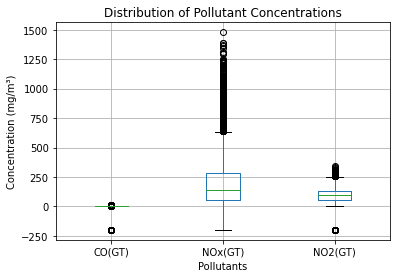

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def draw_Boxplot(URL):
  """
  This function reads the air quality dataset ( data source UCI Machine Learning Repository),
  cleans and prepares the data and creates a Boxplot Chart using the Pyplot module of Matplotlib.

  Parameters: str- File Path

  Returns:
  None
  """
  # Read the air quality dataset
  air_quality = pd.read_excel(URL)
  air_quality =air_quality.dropna()

  # Select relevant columns
  air_quality = air_quality[['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']]

  # Create the plot
  air_quality.boxplot(column=['CO(GT)', 'NOx(GT)', 'NO2(GT)'])

  # Add labels and title
  plt.xlabel('Pollutants')
  plt.ylabel('Concentration (mg/m³)')
  plt.title('Distribution of Pollutant Concentrations')

  # Show the plot
  plt.show()

file_path = "/content/AirQualityUCI.xlsx"
draw_Boxplot(file_path)

I picked this type of graph because it allows us to compare the distribution of multiple variables in a single plot. In this case, we are looking at the distribution of three pollutants: CO(GT), NOx(GT), and NO2(GT). The boxplot shows us the median, interquartile range, and outliers for each variable. From the graph, we can observe that the concentration of NO2(GT) has the highest median and the most outliers, indicating that it has a wider range of values and is more likely to have extreme values compared to the other pollutants. We can also see that the concentration of CO(GT) has the lowest median and range, indicating that it is less variable compared to the other pollutants.